# Thinkful Intro Unit Capstone #

## Analysis of the 2012-2017 Baltimore Crime Data ##
## By: Lorenz Madarang ##

## Data: https://www.kaggle.com/sohier/crime-in-baltimore ##

### Key Terms ###
- __CrimeDate__ : date with format as mm/dd/yyyy
- __CrimeTime__ : time is coded in 24-hour format (hh:mm:ss)
- __CrimeCode__ : FBI Uniformed Crime Reporting code for the specific crime. The details of what the code identifies can be found in the FBI Uniformed Crime Reporting Handbook found at this website https://www2.fbi.gov/ucr/handbook/ucrhandbook04.pdf
- __Location__ : the address where the crime occurred
- __Description__ : describes the general category of the crime
- __Inside/Outside__ : tells whether the crime was committed inside or outside
- __Weapon__ : categories for the weapon of choice to committ crime 
- __Post__ : refers to the number of the nearest Baltimore Police Station where that crime was committed
- __District__ : district where the crime was committed
- __Neighborhood__ : neighborhood where the crime was committed
- __Longitude__: Longitude where the crime was committed
- __Latitude__: Latitude where the crime was committed
- __Location1__: Longitude and Latitude pair where the crime was committed
- __Premise__: Premise where the crime was committed
- __Total Incidents__: column that only indicates that "1" instance of that crime was committed

In [113]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from scipy.stats import ttest_ind

### Data Exploration ###

- __Nulls in Data__: CrimeDate, CrimeTime, CrimeCode, Description and Total Incidents are the only columns with no Nulls
- __CrimeDate__: 
    -  Oldest crime recorded is '01/01/2012'
    -  Most recent crime recorded is '09/02/2017'


- __CrimeTime__: the most granular level of time is at the minute level, there is no second level info for crime
- __CrimeCode__: when CrimeCode is referenced in the FBI UCR handbook it has a description of the crime
- __Description__: there are 15 unique categories of crime description
- __Inside/Outside__: they use values 'I', 'O', 'Inside' and 'Outside' when corrected the number of Inside crimes are       similar to the number of Outside crimes
- __Weapon__: there are only four categories for weapon
- __Post__: 
    - There are 179 unique posts. P
    - Post gives an idea of which district the crime was committed because the hundreds numeral of the post number is       shared among posts.


- __District__: there are nine unique districts
- __Neighborhood__: there 279 unique neighborhoods
- __Premise__: there are 124 different premise locations where crimes have occurred.

In [2]:
baltimore = pd.read_csv('Baltimore-Crime-Data.csv')

In [3]:
baltimore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276529 entries, 0 to 276528
Data columns (total 15 columns):
CrimeDate          276529 non-null object
CrimeTime          276529 non-null object
CrimeCode          276529 non-null object
Location           274322 non-null object
Description        276529 non-null object
Inside/Outside     266250 non-null object
Weapon             95577 non-null object
Post               276305 non-null float64
District           276449 non-null object
Neighborhood       273789 non-null object
Longitude          274325 non-null float64
Latitude           274325 non-null float64
Location 1         274325 non-null object
Premise            265772 non-null object
Total Incidents    276529 non-null int64
dtypes: float64(3), int64(1), object(11)
memory usage: 31.6+ MB


In [25]:
baltimore.isnull().sum()

CrimeDate               0
CrimeTime               0
CrimeCode               0
Location             2207
Description             0
Inside/Outside      10279
Weapon             180952
Post                  224
District               80
Neighborhood         2740
Longitude            2204
Latitude             2204
Location 1           2204
Premise             10757
Total Incidents         0
InsideOutside       10279
dtype: int64

In [4]:
baltimore.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,Total Incidents
0,09/02/2017,23:30:00,3JK,4200 AUDREY AVE,ROBBERY - RESIDENCE,I,KNIFE,913.0,SOUTHERN,Brooklyn,-76.60541,39.22951,"(39.2295100000, -76.6054100000)",ROW/TOWNHO,1
1,09/02/2017,23:00:00,7A,800 NEWINGTON AVE,AUTO THEFT,O,NaN,133.0,CENTRAL,Reservoir Hill,-76.63217,39.31360,"(39.3136000000, -76.6321700000)",STREET,1
2,09/02/2017,22:53:00,9S,600 RADNOR AV,SHOOTING,Outside,FIREARM,524.0,NORTHERN,Winston-Govans,-76.60697,39.34768,"(39.3476800000, -76.6069700000)",Street,1
3,09/02/2017,22:50:00,4C,1800 RAMSAY ST,AGG. ASSAULT,I,OTHER,934.0,SOUTHERN,Carrollton Ridge,-76.64526,39.28315,"(39.2831500000, -76.6452600000)",ROW/TOWNHO,1
4,09/02/2017,22:31:00,4E,100 LIGHT ST,COMMON ASSAULT,O,HANDS,113.0,CENTRAL,Downtown West,-76.61365,39.28756,"(39.2875600000, -76.6136500000)",STREET,1


In [5]:
baltimore.tail()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,Total Incidents
276524,01/01/2012,00:00:00,6J,1400 JOH AVE,LARCENY,I,NaN,832.0,SOUTHWESTERN,Violetville,-76.67195,39.26132,"(39.2613200000, -76.6719500000)",OTHER - IN,1
276525,01/01/2012,00:00:00,6J,5500 SINCLAIR LN,LARCENY,O,NaN,444.0,NORTHEASTERN,Frankford,-76.53829,39.32493,"(39.3249300000, -76.5382900000)",OTHER - OU,1
276526,01/01/2012,00:00:00,6E,400 N PATTERSON PK AV,LARCENY,O,NaN,321.0,EASTERN,CARE,-76.58497,39.29573,"(39.2957300000, -76.5849700000)",STREET,1
276527,01/01/2012,00:00:00,5A,5800 LILLYAN AV,BURGLARY,I,NaN,425.0,NORTHEASTERN,Glenham-Belhar,-76.54578,39.34701,"(39.3470100000, -76.5457800000)",APT. LOCKE,1
276528,01/01/2012,00:00:00,5A,1900 GRINNALDS AV,BURGLARY,I,NaN,831.0,SOUTHWESTERN,Morrell Park,-76.65094,39.26698,"(39.2669800000, -76.6509400000)",ROW/TOWNHO,1


In [5]:
baltimore.iloc[3]['CrimeCode']

'4C'

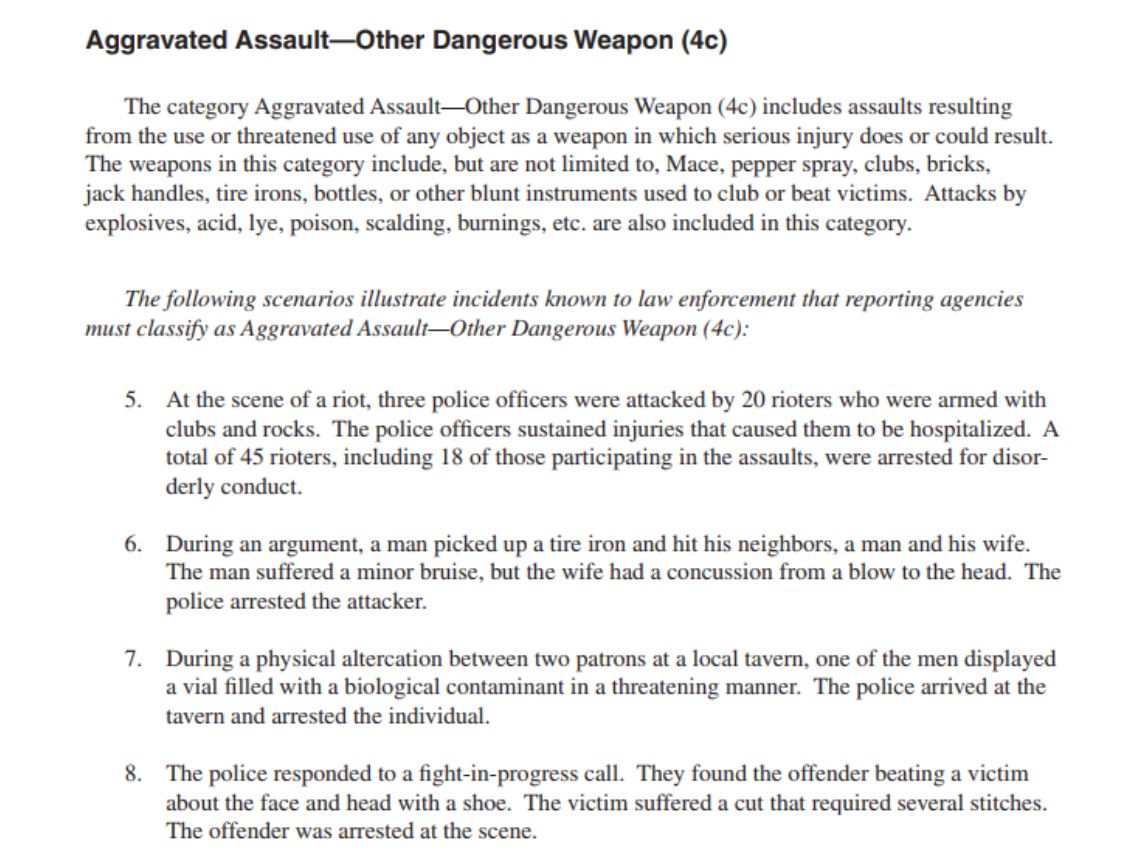

In [7]:
img = Image.open('4c.png')
img

In [8]:
baltimore['Description'].unique()

array(['ROBBERY - RESIDENCE', 'AUTO THEFT', 'SHOOTING', 'AGG. ASSAULT',
       'COMMON ASSAULT', 'BURGLARY', 'HOMICIDE', 'ROBBERY - STREET',
       'ROBBERY - COMMERCIAL', 'LARCENY', 'LARCENY FROM AUTO', 'ARSON',
       'ROBBERY - CARJACKING', 'ASSAULT BY THREAT', 'RAPE'], dtype=object)

In [11]:
baltimore['Inside/Outside'].value_counts()

I          131999
O          129782
Outside      3837
Inside        632
Name: Inside/Outside, dtype: int64

In [24]:
#Create new column
baltimore['InsideOutside'] = baltimore['Inside/Outside']

#Get Inside instances
inside1 = int(baltimore[baltimore['InsideOutside'] == 'Inside'].InsideOutside.value_counts())
inside2 = int(baltimore[baltimore['InsideOutside'] == 'I'].InsideOutside.value_counts())

#Get Outside instances
outside1 = int(baltimore[baltimore['InsideOutside'] == 'Outside'].InsideOutside.value_counts())
outside2 = int(baltimore[baltimore['InsideOutside'] == 'O'].InsideOutside.value_counts())

print("There are {} inside instances".format(inside1 + inside2))
print("There are {} outside instances".format(outside1 + outside2))

There are 132631 inside instances
There are 133619 outside instances


In [26]:
baltimore['Weapon'].unique()

array(['KNIFE', nan, 'FIREARM', 'OTHER', 'HANDS'], dtype=object)

In [28]:
print(baltimore['Post'].unique())
print(len(baltimore['Post'].unique()))

[ 913.  133.  524.  934.  113.  922.  232.  123.  641.  332.  844.  614.
  444.  243.  343.  132.  212.  426.  513.  731.  612.  415.  111.  833.
  112.  411.  141.  222.  323.  613.  423.  842.  733.  823.  713.  321.
  832.  442.  341.  643.  841.  621.  632.  231.  941.  533.  342.  233.
  242.  211.  213.  714.  531.  712.  932.  432.  942.  723.  631.  843.
  642.  331.  412.  911.  811.  221.  322.  623.  313.  923.  935.  142.
  422.  512.  532.  224.  831.  931.  311.  425.  812.  743.  424.  443.
  943.  611.  523.  511.  822.  721.  223.  622.  441.  333.  633.  514.
  522.  542.  312.  413.  121.  742.  541.  143.  131.  521.  722.  241.
  933.  421.  732.  813.  741.  434.  433.  711.  814.  431.  414.  445.
  945.  921.  122.  912.  543.  821.   nan  435.  314.  944.  234.  535.
  144.  625.  525.  215.  324.  315.  624.  824.  736.  924.  836.  526.
  217.  527.  214.  725.  536.  135.  325.  635.  334.  436.  815.  914.
  124.  826.  735.  634.  715.  534.  835.    2.  1

In [29]:
baltimore.iloc[3]['Post']

934.0

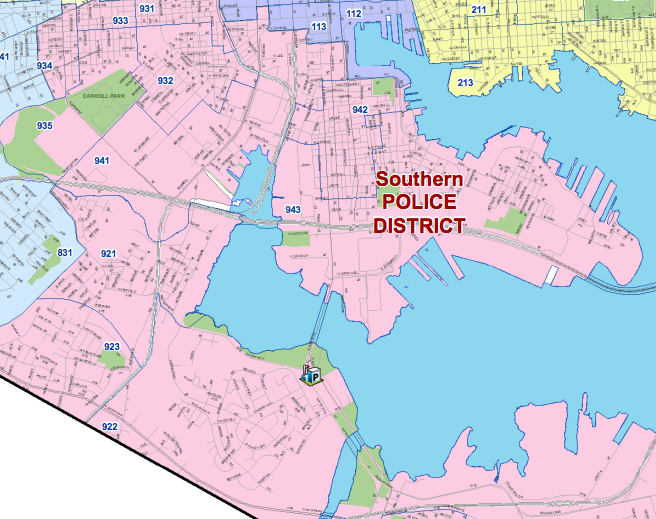

In [30]:
img1 = Image.open('934.png')
img1

The next column after 'Post' is the 'District' column.  There are nine unique districts in Baltimore.  

In [31]:
baltimore['District'].unique()

array(['SOUTHERN', 'CENTRAL', 'NORTHERN', 'SOUTHEASTERN', 'NORTHWESTERN',
       'EASTERN', 'SOUTHWESTERN', 'NORTHEASTERN', 'WESTERN', nan], dtype=object)

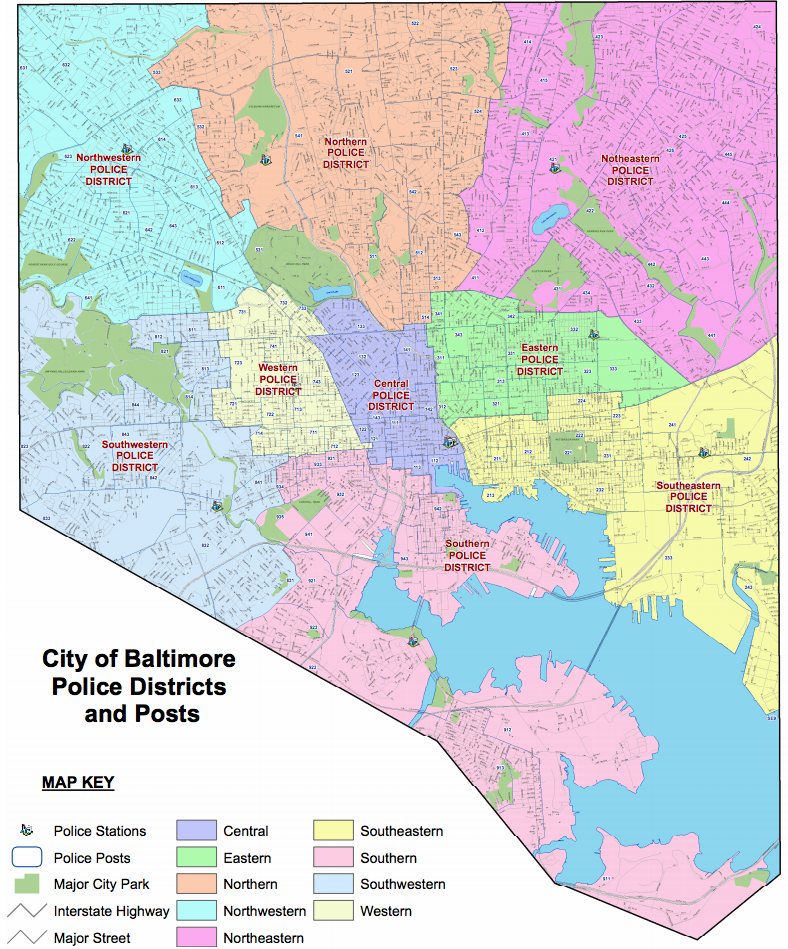

In [32]:
img2 = Image.open('Baltimore District.png')
img2

In [34]:
print(len(baltimore['Neighborhood'].unique()))

279


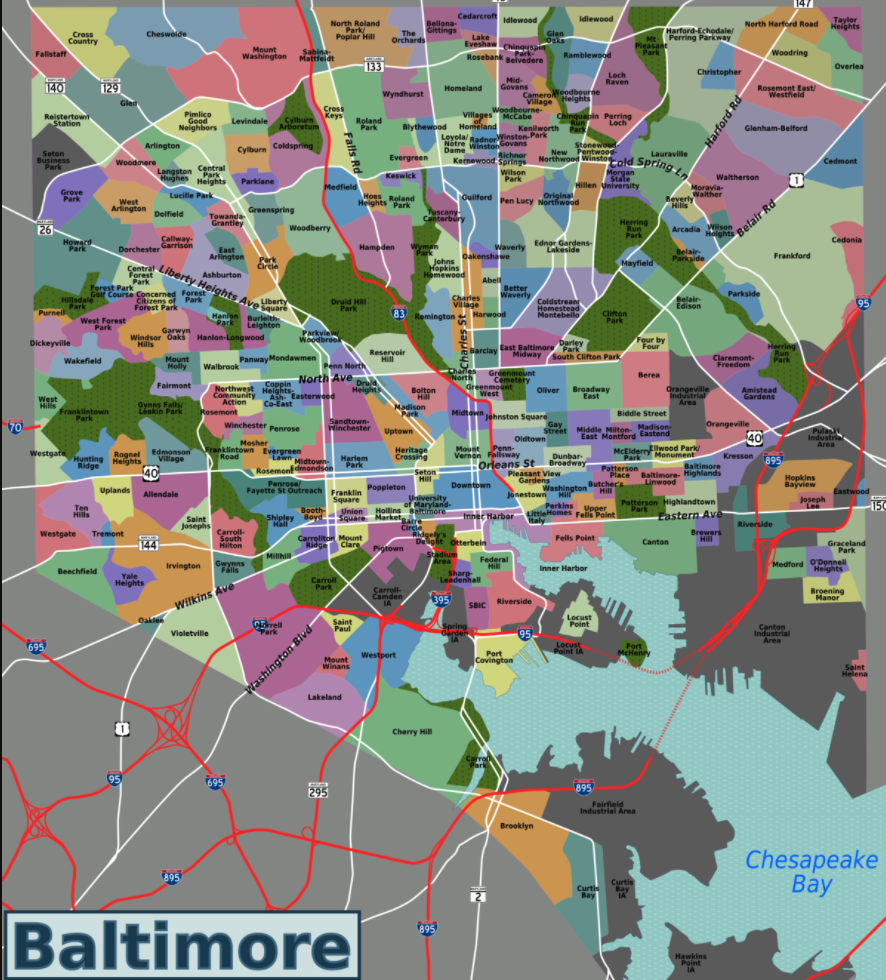

In [41]:
img3 = Image.open('Baltimore Neighborhoods.png')
img3

The next column is 'Premise' and it describe the premise location of the crime.  There are 124 different premise locations where crimes have occurred.  

In [36]:
baltimore['Premise'].unique()

array(['ROW/TOWNHO', 'STREET', 'Street', 'RETAIL/SMA', nan, 'YARD',
       'OTHER - IN', 'CONVENIENC', 'OFFICE BUI', 'APT/CONDO', 'PARKING LO',
       'LAUNDRY/CL', 'CARRY OUT', 'HOSP/NURS.', 'RESTAURANT', 'BAR',
       'GARAGE ON', 'ALLEY', 'DRIVEWAY', 'PORCH/DECK', 'SHED/GARAG',
       'TRACTOR TR', 'GAS STATIO', 'PLAYGROUND', 'BUS/AUTO', 'DRUG STORE',
       'PARK', 'GROCERY/CO', 'CAR LOT-NE', 'SHOPPING M', 'LIQUOR STO',
       'CHAIN FOOD', 'OTHER - OU', 'POLICE DEP', 'CLOTHING/S',
       'YARD/BUSIN', 'SPECIALTY', 'POOL/BOWLI', 'INNER HARB', 'VACANT BUI',
       'SCHOOL', 'OTHER/RESI', 'HOTEL/MOTE', 'DEPARTMENT', 'WAREHOUSE',
       'BUS.  STOR', 'RELIGIOUS', 'Dwelling', 'TAVERN/NIG', 'APARTMENT',
       'BARBER/BEA', 'SINGLE HOU', 'PUBLIC BUI', 'MINI STORA', 'FAST FOOD',
       'DOCTORS OF', 'STADIUM', 'HOUSE UNDE', 'UNKNOWN', 'Alley',
       'BUS/RAILRO', 'LIBRARY', 'CAR  REPAI', 'AUTO PARTS', 'CONSTRUCTI',
       'Parking Lo', 'WHOLESALE/', 'Gas Statio', 'Vehicle', 'FIRE DEPAR'

In [37]:
print(len(baltimore['Premise'].unique()))

124


In [42]:
baltimore['Total Incidents'].unique()

array([1])

## Analysis Questions ##

##### 1.) What is the trend of the Baltimore Crime Data from 2012-2017? #####

In [43]:
# Create a new column that has the year of which the crime occurred

for n in range(0, 276528):
    x = baltimore.loc[n, 'CrimeDate']
    baltimore.loc[n,'CrimeYear'] = int(x[6:])

In [45]:
# Create a dataframe that has the number of crime occurrences by year from 2012-2017

crime_year = baltimore.CrimeYear.value_counts()
crime_yearindex = crime_year.sort_index(axis=0, ascending=True)
print(crime_yearindex)


2012.0    49574
2013.0    49571
2014.0    45969
2015.0    48841
2016.0    48749
2017.0    33824
Name: CrimeYear, dtype: int64


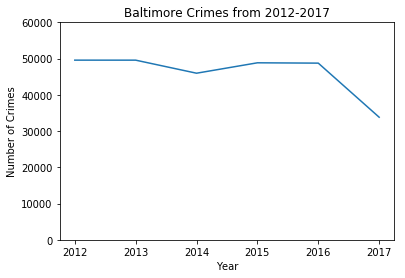

In [56]:
# Line plot of crime data from 2012-2017

fig = plt.figure(figsize=(20, 20))
f, ax = plt.subplots(1)
xdata = crime_yearindex.index
ydata = crime_yearindex
ax.plot(xdata, ydata)
ax.set_ylim(ymin=0, ymax=60000)
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title('Baltimore Crimes from 2012-2017')
plt.show(f)

There looks like there is an overall downward trend.  The year 2012 was the most dangerous, there was a slight dip in 2014 and then it went back up a little.  From 2015-2016 the crime stabilized and then it took a noticeable dip in 2017.  

##### 2.) What is the most dangerous hour (The hour where most crimes occur)? #####

In [44]:
# Create a new column that has the hour at which the crime occurred

for n in range(0, 276528):
    x = baltimore.loc[n, 'CrimeTime']
    baltimore.loc[n,'CrimeHour'] = int(x[:2])

In [52]:
# Create a dataframe with the crime occurrences by hour 

crime_hour = baltimore.CrimeHour.value_counts()
crime_hourindex = crime_hour.sort_index(axis=0, ascending=True)
print(crime_hourindex)

0.0     12738
1.0     11297
2.0      8187
3.0      5703
4.0      4345
5.0      3794
6.0      4510
7.0      7190
8.0      9680
9.0      9909
10.0    10718
11.0    10981
12.0    13974
13.0    12026
14.0    13116
15.0    15615
16.0    15536
17.0    16198
18.0    16724
19.0    15175
20.0    15346
21.0    15403
22.0    14882
23.0    13480
24.0        1
Name: CrimeHour, dtype: int64


In [66]:
# There is only one occurrence of one crime at hour 24. For 24-hour format, midnight can be described as either 24:00
# or 00:00, so we will change the observation from 24 to 0

print(baltimore[baltimore['CrimeHour'] == 24])
baltimore.at[239894, 'CrimeHour'] = 0
print(baltimore.loc[239894])

         CrimeDate CrimeTime CrimeCode      Location Description  \
239894  09/24/2012  24:00:00        9S  2100 VINE ST    SHOOTING   

       Inside/Outside   Weapon   Post District               Neighborhood  \
239894        Outside  FIREARM  714.0  WESTERN  Penrose/Fayette Street Ou   

        Longitude  Latitude                       Location 1 Premise  \
239894  -76.65039  39.28993  (39.2899300000, -76.6503900000)     NaN   

        Total Incidents InsideOutside  CrimeYear  CrimeHour  
239894                1       Outside     2012.0       24.0  
CrimeDate                               09/24/2012
CrimeTime                                 24:00:00
CrimeCode                                       9S
Location                              2100 VINE ST
Description                               SHOOTING
Inside/Outside                             Outside
Weapon                                     FIREARM
Post                                           714
District                       

In [69]:
# Incorporate the change of the observation

crime_hour = baltimore.CrimeHour.value_counts()
crime_hourindex = crime_hour.sort_index(axis=0, ascending=True)

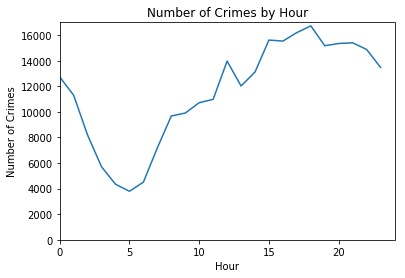

In [70]:
# Create line plot that shows the crime occurrence by hour

fig = plt.figure(figsize=(20, 20))
f, ax = plt.subplots(1)
xdata = crime_hourindex.index
ydata = crime_hourindex
ax.plot(xdata, ydata)
ax.set_ylim(ymin=0, ymax=17000)
ax.set_xlim(xmin=0, xmax=24)
plt.xlabel('Hour')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes by Hour')
plt.show(f)

The most dangerous hour is 18:00, which translates to 6pm.  The least dangerous hour is 05:00, which translates to 5am.  The trend that the line plot suggests makes sense.  I predicted that the majority of the crime would be commited in the evening to late evening and that there would not be as much crime in the early mornings.  

In [57]:
# Create a pivot table to identify if hours had more occurence of specific crime categories

baltimore.pivot_table(index='Description',
               columns='CrimeHour',
               values='CrimeTime',
               aggfunc= 'count')

CrimeHour,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0
Description,,,,,,,,,,,,,,,,,,,,,
AGG. ASSAULT,1644.0,1604.0,1267.0,812.0,523.0,336.0,308.0,422.0,593.0,631.0,...,1483.0,1405.0,1469.0,1513.0,1548.0,1658.0,1726.0,1837.0,1733.0,NaN
ARSON,109.0,118.0,105.0,111.0,72.0,53.0,30.0,24.0,35.0,36.0,...,42.0,43.0,38.0,58.0,59.0,65.0,70.0,74.0,94.0,NaN
ASSAULT BY THREAT,110.0,93.0,60.0,46.0,35.0,32.0,37.0,77.0,161.0,214.0,...,242.0,213.0,191.0,178.0,167.0,172.0,138.0,132.0,119.0,NaN
AUTO THEFT,1468.0,1139.0,735.0,499.0,371.0,375.0,516.0,750.0,858.0,689.0,...,1007.0,1204.0,1525.0,1784.0,1754.0,1988.0,2191.0,2221.0,1977.0,NaN
BURGLARY,1738.0,1361.0,1129.0,891.0,886.0,945.0,1170.0,2253.0,2582.0,2294.0,...,2177.0,2249.0,2321.0,2139.0,1685.0,1567.0,1494.0,1451.0,1316.0,NaN
COMMON ASSAULT,2430.0,2538.0,2036.0,1276.0,865.0,541.0,545.0,826.0,1256.0,1463.0,...,2753.0,2239.0,2314.0,2448.0,2367.0,2355.0,2480.0,2309.0,2514.0,NaN
HOMICIDE,92.0,91.0,69.0,44.0,36.0,21.0,26.0,15.0,14.0,25.0,...,85.0,77.0,72.0,77.0,79.0,97.0,133.0,123.0,137.0,NaN
LARCENY,2104.0,1706.0,742.0,603.0,456.0,537.0,792.0,1487.0,2279.0,2612.0,...,4398.0,4436.0,4285.0,3973.0,3254.0,2972.0,2516.0,2185.0,1639.0,NaN
LARCENY FROM AUTO,1332.0,975.0,732.0,462.0,375.0,377.0,608.0,930.0,1308.0,1314.0,...,1755.0,2026.0,2481.0,2913.0,2491.0,2511.0,2486.0,2339.0,1829.0,NaN


##### 3.) Which District has the most crime? #####

In [75]:
#Create a dataframe that has the number of crime occurences by district

districtcount = baltimore.District.value_counts()
baltimore.District.value_counts()

NORTHEASTERN    43006
SOUTHEASTERN    38291
SOUTHERN        31850
NORTHERN        31665
CENTRAL         31631
NORTHWESTERN    28061
SOUTHWESTERN    26092
EASTERN         23635
WESTERN         22218
Name: District, dtype: int64

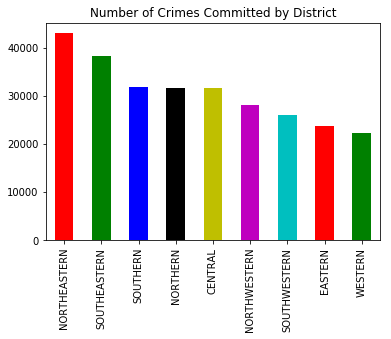

In [72]:
#Create bar graph of number of crimes by district

my_colors = 'rgbkymc'
districtcount.plot(kind='bar',
                color=my_colors,
                title='Number of Crimes Committed by District')

The most dangerous district is the Northeastern district and the least dangerous district is the Western district. 

##### 4.) Which Crime Category has the most occurrences? #####

In [77]:
#Create a dataframe that has the occurrence of crimes by category

crimecount = baltimore.Description.value_counts()
baltimore.Description.value_counts()

LARCENY                 60528
COMMON ASSAULT          45518
BURGLARY                42538
LARCENY FROM AUTO       36295
AGG. ASSAULT            27513
AUTO THEFT              26838
ROBBERY - STREET        17691
ROBBERY - COMMERCIAL     4141
ASSAULT BY THREAT        3503
SHOOTING                 2910
ROBBERY - RESIDENCE      2866
RAPE                     1637
HOMICIDE                 1559
ROBBERY - CARJACKING     1528
ARSON                    1464
Name: Description, dtype: int64

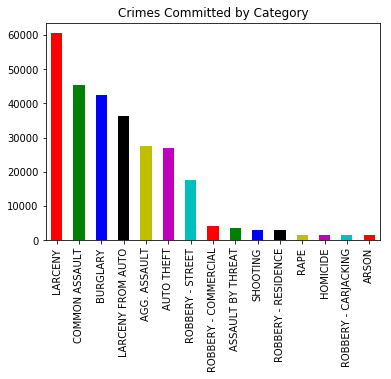

In [78]:
#Create bar graph of number of crimes by category

my_colors = 'rgbkymc'
crimecount.plot(kind='bar',
                color=my_colors,
                title='Crimes Committed by Category')

Larceny is the most common crime and Arson is the least common crime. 

##### 5.) Amongst the neighborhoods, what is the spread of the most occuring crime category? #####

In [94]:
# Create a list of unique neighborhoods in Baltimore and then create an empty list which will be appended with larceny
# counts by neighborhood.

neighborhood_list = baltimore['Neighborhood'].unique()
larceny_list = []

# Iterate through unique neighborhood list and then append the count of larceny for that neighborhood to the empty 
# larceny list.

for neighborhood in neighborhood_list:
    x = baltimore[(baltimore['Neighborhood'] == neighborhood) & (baltimore['Description'] == 'LARCENY')]
    larceny_list.append(len(x))

# Create a pandas dataframe with the Larceny counts and sort the values with the highest count at the top 
    
neighborhood_larceny = np.array(larceny_list)
neighborhood_larceny = pd.DataFrame(neighborhood_larceny)
neighborhood_larceny.columns = ['Larceny Counts']
neighborhood_larceny.index = neighborhood_list
neighborhood_larceny = neighborhood_larceny.sort_values(['Larceny Counts'], ascending = False)
print(neighborhood_larceny)

                           Larceny Counts
Downtown                             2775
Inner Harbor                         2047
Belair-Edison                        1479
Mondawmin                            1279
Frankford                            1254
Canton                                918
Fells Point                           888
Pulaski Industrial Area               870
Washington Village/Pigtow             809
Canton Industrial Area                782
Upton                                 744
Mid-Town Belvedere                    715
Reisterstown Station                  709
Better Waverly                        698
Brooklyn                              698
Cherry Hill                           679
Hampden                               654
Mount Vernon                          641
Charles Village                       626
Patterson Park Neighborho             617
East Baltimore Midway                 594
Sandtown-Winchester                   589
Baltimore Highlands               

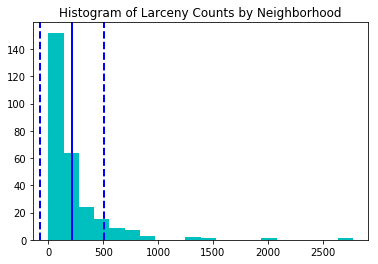

In [102]:
# Plot a histogram of the larceny counts 

#plt.figure()
#neighborhood_larceny.plot.hist(bins=50)

#Plot a histogram for larceny counts.
plt.hist(neighborhood_larceny['Larceny Counts'], bins=20, color='c')

# Add a vertical line at the mean.
plt.axvline(neighborhood_larceny['Larceny Counts'].mean(), color='b', linestyle='solid', linewidth=2)

# Add a vertical line at one standard deviation above the mean.
plt.axvline(neighborhood_larceny['Larceny Counts'].mean() + neighborhood_larceny['Larceny Counts'].std(), color='b', linestyle='dashed', linewidth=2)

# Add a vertical line at one standard deviation below the mean.
plt.axvline(neighborhood_larceny['Larceny Counts'].mean() - neighborhood_larceny['Larceny Counts'].std(), color='b', linestyle='dashed', linewidth=2) 

plt.title('Histogram of Larceny Counts by Neighborhood')

# Print the histogram.
plt.show()

In [97]:
neighborhood_larceny['Larceny Counts'].median()

119.0

In [98]:
neighborhood_larceny['Larceny Counts'].mean()

214.98924731182797

In [99]:
neighborhood_larceny['Larceny Counts'].std()

290.9532890873145

Looking at the histogram of larceny counts by neighborhood, it is very clear that the distribution is heavily skewed to the right.  This skewness is confirmed by the fact that the mean larceny count (214.99) is greater than the median larceny count (119).  Also the distribution has a noticeable spread which is indicated by the standard deviation of 290.95.  

### Difference between Larceny Counts in the Northeastern and Western District neighborhoods ###

In [108]:
# Get unique list of neighborhoods in the Northeastern district and create an empty list to hold larceny counts

ne_neighborhoods = baltimore[baltimore['District'] == 'NORTHEASTERN']
ne_neighborhoodlist = ne_neighborhoods['Neighborhood'].unique()

larceny_count1 = []

# Iterate through Northeastern neighborhood list and append the larceny counts to list

for neighborhood in ne_neighborhoodlist:
    x = ne_neighborhoods[(ne_neighborhoods['Neighborhood'] == neighborhood) & (baltimore['Description'] == 'LARCENY')]
    larceny_count1.append(len(x))

# Create a pandas dataframe with the Larceny counts and sort the values with the highest count at the top 
    
ne_larceny = np.array(larceny_count1)
ne_larceny = pd.DataFrame(ne_larceny)
ne_larceny.columns = ['Larceny Counts']
ne_larceny.index = ne_neighborhoodlist
ne_larceny = ne_larceny.sort_values(['Larceny Counts'], ascending = False)
print(ne_larceny)



/Users/lorenzmadarang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


                           Larceny Counts
Belair-Edison                        1479
Frankford                            1254
Coldstream Homestead Mont             563
Hamilton Hills                        541
Waltherson                            369
Ednor Gardens-Lakeside                353
Loch Raven                            342
Glenham-Belhar                        334
North Harford Road                    319
New Northwood                         255
Cedmont                               247
Lauraville                            213
Armistead Gardens                     204
Pulaski Industrial Area               203
Hillen                                172
Westfield                             172
Clifton Park                          146
Rosemont East                         106
Perring Loch                          103
Parkside                              100
Four By Four                           96
Idlewood                               92
Orchard Ridge                     

In [111]:
# Remove the NaN indexed observation

ne_larceny = ne_larceny.loc[ne_larceny.index.dropna()]
print(ne_larceny)

                           Larceny Counts
Belair-Edison                        1479
Frankford                            1254
Coldstream Homestead Mont             563
Hamilton Hills                        541
Waltherson                            369
Ednor Gardens-Lakeside                353
Loch Raven                            342
Glenham-Belhar                        334
North Harford Road                    319
New Northwood                         255
Cedmont                               247
Lauraville                            213
Armistead Gardens                     204
Pulaski Industrial Area               203
Hillen                                172
Westfield                             172
Clifton Park                          146
Rosemont East                         106
Perring Loch                          103
Parkside                              100
Four By Four                           96
Idlewood                               92
Orchard Ridge                     

In [109]:
# Get unique list of neighborhoods in the Western district and create an empty list to hold larceny counts

w_neighborhoods = baltimore[baltimore['District'] == 'WESTERN']
w_neighborhoodlist = w_neighborhoods['Neighborhood'].unique()

larceny_count2 = []

# Iterate through Western neighborhood list and append the larceny counts to list

for neighborhood in w_neighborhoodlist:
    x = w_neighborhoods[(w_neighborhoods['Neighborhood'] == neighborhood) & (baltimore['Description'] == 'LARCENY')]
    larceny_count2.append(len(x))

# Create a pandas dataframe with the Larceny counts and sort the values with the highest count at the top 
    
w_larceny = np.array(larceny_count2)
w_larceny = pd.DataFrame(w_larceny)
w_larceny.columns = ['Larceny Counts']
w_larceny.index = w_neighborhoodlist
w_larceny = w_larceny.sort_values(['Larceny Counts'], ascending = False)
print(w_larceny)

/Users/lorenzmadarang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


                           Larceny Counts
Mondawmin                             765
Sandtown-Winchester                   589
Penn North                            327
Harlem Park                           308
Penrose/Fayette Street Ou             275
Franklin Square                       198
Poppleton                             198
Bridgeview/Greenlawn                  185
Coppin Heights/Ash-Co-Eas             164
Midtown-Edmondson                     151
Rosemont Homeowners/Tenan             133
Parkview/Woodbrook                    114
Easterwood                            109
Mosher                                 99
Panway/Braddish Avenue                 65
Evergreen Lawn                         62
Druid Heights                          29
Boyd-Booth                             16
Hollins Market                         14
Reservoir Hill                         11
Upton                                   8
Northwest Community Actio               5
Union Square                      

In [112]:
w_larceny = w_larceny.loc[w_larceny.index.dropna()]
print(w_larceny)

                           Larceny Counts
Mondawmin                             765
Sandtown-Winchester                   589
Penn North                            327
Harlem Park                           308
Penrose/Fayette Street Ou             275
Franklin Square                       198
Poppleton                             198
Bridgeview/Greenlawn                  185
Coppin Heights/Ash-Co-Eas             164
Midtown-Edmondson                     151
Rosemont Homeowners/Tenan             133
Parkview/Woodbrook                    114
Easterwood                            109
Mosher                                 99
Panway/Braddish Avenue                 65
Evergreen Lawn                         62
Druid Heights                          29
Boyd-Booth                             16
Hollins Market                         14
Reservoir Hill                         11
Upton                                   8
Northwest Community Actio               5
Union Square                      

##### 6.) Is there a significant difference in larceny counts between the Northeastern and Western neighborhoods #####

In [117]:
# T-test to determine is there is a difference between the means of the Northeastern and Western neighborhood counts of 

diff=ne_larceny['Larceny Counts'].mean( ) - w_larceny['Larceny Counts'].mean()
size = np.array([len(ne_larceny), len(w_larceny)])
sd = np.array([ne_larceny['Larceny Counts'].std(), w_larceny['Larceny Counts'].std()])
diff_se = (sum(sd ** 2 / size)) ** 0.5
t_val = diff/diff_se

print(ttest_ind(ne_larceny['Larceny Counts'], w_larceny['Larceny Counts'], equal_var=False))

Ttest_indResult(statistic=0.73667807810417285, pvalue=0.46374450158778491)


According to the t-test, the t-statistic indicates that the difference between the mean counts of larceny between the Northeastern and Western neighborhoods are not significantly different.  The p-value is only 0.46, it is greater than 0.05 which states that the test is not statistically significant.  

### Proposition for Further Research ###

##### 1.) I propose that further research can be done by using Python mapping packages to map out the data and visualize where the specific crimes occur by using the Longitude and Latitude datapoints, this can help visualize crime cluster locations #####

##### 2.) I would like to expound on my pivot table of Crime Description and Crime Hour and use Python mapping packages and create a visualization that iterates through the hours and shows where certain crimes pop up #####

##### 3.) Lastly I would like to try and maybe use Neural Network to try and predict when and where a crime will occur #####